## 0. Libraries and Personal Tools

In [2]:
import sys
import datatable as dt
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
from os.path import abspath

from tqdm import tqdm
from time import time

In [3]:
# Set the default figure size and theme to display good looking matplotlib plots.
rcParams["figure.figsize"] = (12, 8)
plt.style.use("fivethirtyeight")

In [4]:
# add absolute path from root to sys.path to use custom modules
sys.path.insert(0, abspath('..'))

# Check if the path is already added to sys.path
[p for p in sys.path if p.endswith("2022")]

# Import custom modules
from src.utils import *

In [5]:
file_names = []
for dirname, _, filenames in os.walk("../data/raw"):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))

In [6]:
train_paths = []
for k in file_names:
    if "train_" in k and "dtypes" not in k:
        train_paths.append(k)
        
train_paths

['../data/raw/train_9.csv',
 '../data/raw/train_4.csv',
 '../data/raw/train_5.csv',
 '../data/raw/train_0.csv',
 '../data/raw/train_1.csv',
 '../data/raw/train_2.csv',
 '../data/raw/train_3.csv',
 '../data/raw/train_6.csv',
 '../data/raw/train_8.csv',
 '../data/raw/train_7.csv']

In [7]:
makedir_check("../data/interim/feather_data")
makedir_check("../data/interim/parquet_data")

The directory, ../data/interim/feather_data, has been created!
The directory, ../data/interim/parquet_data, has been created!


In [8]:
# Author: Ayush Bihani
# Source: https://www.kaggle.com/code/hsuyab/fast-loading-high-compression-with-feather/notebook

time_read = {}
size_file = {}

for file_path in tqdm(train_paths):
    
    #ext can be parquet or feather
    times = {}
    sizes = {}
    
    #stores name of file to be saved as 
    name_files_ftr =  (
        file_path.split('/')[-1]
        .replace('.', '_compressed.')
        .replace('csv','ftr')
    )
    name_files_parquet = name_files_ftr.replace('ftr', 'parquet')
    
    #store only file name without extension
    file_only = name_files_ftr.split('_c')[0]

    #read file csv
    t1 = time()
    df = pd.read_csv(file_path)
    sizes['memory_csv'] = df.memory_usage(deep=True).sum()/(1024**2)
    times['read_csv'] = time() - t1
    df = reduce_mem_usage(df)
    
    #save to feather
    df.to_feather("../data/interim/feather_data/"+name_files_ftr)
    
    #calculate reading time for feather
    t1 = time()
    df = pd.read_feather("../data/interim/feather_data/"+name_files_ftr)
    sizes['memory_feather'] = df.memory_usage(deep=True).sum()/(1024**2)
    times['read_feather'] = time() - t1
    
    #save to parquet
    df = pd.read_csv(file_path)
    df= reduce_mem_usage(df, keep_float16=False)
    df.to_parquet("../data/interim/parquet_data/"+name_files_parquet)
    
    #calculate reading time of parquet
    t1 = time()
    df = pd.read_parquet("../data/interim/parquet_data/"+name_files_parquet)
    times['read_parquet'] = time() - t1
    sizes['memory_parquet'] = df.memory_usage(deep=True).sum()/(1024**2)
    
    #store size and time for a particular file
    time_read[file_only] = times
    size_file[file_only] = sizes

  0%|          | 0/10 [00:00<?, ?it/s]

Memory usage of dataframe is 978.63 MB
Memory usage after optimization is: 240.65 MB
Decreased by 75.4%
Memory usage of dataframe is 978.63 MB
Memory usage after optimization is: 461.24 MB
Decreased by 52.9%


 10%|█         | 1/10 [01:41<15:10, 101.15s/it]

Memory usage of dataframe is 985.63 MB
Memory usage after optimization is: 242.37 MB
Decreased by 75.4%
Memory usage of dataframe is 985.63 MB
Memory usage after optimization is: 464.54 MB
Decreased by 52.9%


 20%|██        | 2/10 [03:21<13:23, 100.50s/it]

Memory usage of dataframe is 974.41 MB
Memory usage after optimization is: 239.61 MB
Decreased by 75.4%
Memory usage of dataframe is 974.41 MB
Memory usage after optimization is: 459.25 MB
Decreased by 52.9%


 30%|███       | 3/10 [05:05<11:55, 102.25s/it]

Memory usage of dataframe is 1000.31 MB
Memory usage after optimization is: 245.98 MB
Decreased by 75.4%
Memory usage of dataframe is 1000.31 MB
Memory usage after optimization is: 471.46 MB
Decreased by 52.9%


 40%|████      | 4/10 [06:40<09:55, 99.18s/it] 

Memory usage of dataframe is 1009.33 MB
Memory usage after optimization is: 248.20 MB
Decreased by 75.4%
Memory usage of dataframe is 1009.33 MB
Memory usage after optimization is: 475.71 MB
Decreased by 52.9%


 50%|█████     | 5/10 [08:26<08:28, 101.66s/it]

Memory usage of dataframe is 989.19 MB
Memory usage after optimization is: 243.24 MB
Decreased by 75.4%
Memory usage of dataframe is 989.19 MB
Memory usage after optimization is: 466.22 MB
Decreased by 52.9%


 60%|██████    | 6/10 [10:09<06:48, 102.21s/it]

Memory usage of dataframe is 984.12 MB
Memory usage after optimization is: 242.00 MB
Decreased by 75.4%
Memory usage of dataframe is 984.12 MB
Memory usage after optimization is: 463.83 MB
Decreased by 52.9%


 70%|███████   | 7/10 [11:51<05:06, 102.18s/it]

Memory usage of dataframe is 960.55 MB
Memory usage after optimization is: 236.20 MB
Decreased by 75.4%
Memory usage of dataframe is 960.55 MB
Memory usage after optimization is: 452.72 MB
Decreased by 52.9%


 80%|████████  | 8/10 [13:29<03:21, 100.72s/it]

Memory usage of dataframe is 1001.45 MB
Memory usage after optimization is: 246.26 MB
Decreased by 75.4%
Memory usage of dataframe is 1001.45 MB
Memory usage after optimization is: 472.00 MB
Decreased by 52.9%


 90%|█████████ | 9/10 [15:18<01:43, 103.58s/it]

Memory usage of dataframe is 981.80 MB
Memory usage after optimization is: 241.43 MB
Decreased by 75.4%
Memory usage of dataframe is 981.80 MB
Memory usage after optimization is: 462.74 MB
Decreased by 52.9%


100%|██████████| 10/10 [16:59<00:00, 101.91s/it]


In [10]:
time_taken_read = pd.DataFrame(time_read).T
#rounding of time to 3 decimal places
time_taken_read = time_taken_read.apply(lambda x: x.round(3))
time_taken_read.columns = ['time_to_read_csv(seconds)', 'time_to_read_feather(seconds)', 'time_to_read_parquet(seconds)']
time_taken_read

,time_to_read_csv(seconds),time_to_read_feather(seconds),time_to_read_parquet(seconds)
train_9,35.268,0.497,1.214
train_4,33.484,0.475,1.021
train_5,27.476,0.474,1.319
train_0,31.349,0.359,1.019
train_1,36.939,0.504,1.004
train_2,35.277,0.524,0.955
train_3,34.850,0.504,1.010
train_6,32.802,0.470,0.884
train_8,35.034,0.504,1.172
train_7,33.718,0.488,0.777


In [11]:
size_of_files = pd.DataFrame(size_file).T
size_of_files = size_of_files.apply(lambda x: x.round(2))
size_of_files.columns = ['memory_csv(MB)', 'memory_feather(MB)', 'memory_parquet(MB)']
size_of_files

,memory_csv(MB),memory_feather(MB),memory_parquet(MB)
train_9,1066.73,240.65,461.24
train_4,1074.69,242.37,464.54
train_5,1062.84,239.61,459.25
train_0,1090.24,245.98,471.46
train_1,1100.07,248.20,475.71
train_2,1078.42,243.24,466.22
train_3,1073.71,242.00,463.83
train_6,1047.93,236.20,452.72
train_8,1092.01,246.26,472.00
train_7,1070.73,241.43,462.74


In [12]:
import gc
gc.collect()

0

## 1. Get Raw Data

In [13]:
dtypes_df = pd.read_csv("../data/raw/train_dtypes.csv")
dtypes = {k: v for (k, v) in zip(dtypes_df.column, dtypes_df.dtype)}

for i in range(10):
    df_aux = pd.read_feather(f"../data/interim/feather_data/train_{i}_compressed.ftr")
    df_aux = df_aux.astype(dtypes)
    df = pd.concat([df, df_aux])

In [14]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 5490.30 MB
Memory usage after optimization is: 2845.17 MB
Decreased by 48.2%


## 2. Exploratory Data Analysis

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23307659 entries, 0 to 2102812
Data columns (total 61 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   game_num                     int16   
 1   event_id                     int32   
 2   event_time                   float16 
 3   ball_pos_x                   float16 
 4   ball_pos_y                   float16 
 5   ball_pos_z                   float16 
 6   ball_vel_x                   float16 
 7   ball_vel_y                   float16 
 8   ball_vel_z                   float16 
 9   p0_pos_x                     float16 
 10  p0_pos_y                     float16 
 11  p0_pos_z                     float16 
 12  p0_vel_x                     float16 
 13  p0_vel_y                     float16 
 14  p0_vel_z                     float16 
 15  p0_boost                     float16 
 16  p1_pos_x                     float16 
 17  p1_pos_y                     float16 
 18  p1_pos_z             

In [16]:
# How many games are available in the dataset?
df.game_num.nunique()

7365

In [17]:
# How many events are available in the dataset?
df.event_id.nunique()

30528

In [20]:
df.team_scoring_next.value_counts(dropna=False)

A      9288104
B      8755942
NaN    5263613
Name: team_scoring_next, dtype: int64

In [21]:
# From the available events, what proportion of them ended up with a team scoring or without any goal?
(
    df
    .groupby("team_scoring_next")
    .event_id
    .nunique()
    .sort_values(ascending=False)
) / df.event_id.nunique()

team_scoring_next
A    0.42217
B    0.40874
Name: event_id, dtype: float64

In [22]:
# Which player has the most goals in the dataset?
(
    df
    .groupby("player_scoring_next")
    .event_id
    .nunique()
) / df.event_id.nunique()

player_scoring_next
-1    0.169091
 0    0.140297
 1    0.143377
 2    0.138496
 3    0.134467
 4    0.137251
 5    0.137022
Name: event_id, dtype: float64

In [57]:
df_team_scoring = (
    df[["event_id", "team_scoring_next"]]
    .drop_duplicates()
    .set_index("event_id")
)

In [58]:
df_event_duration = (
    df_team_scoring
    .join(
        df
        .groupby(["event_id", "team_A_scoring_within_10sec"])
        [["event_time"]]
        .count()
        .pivot_table(index="event_id", columns="team_A_scoring_within_10sec", values="event_time")
        .rename(columns={0: "team_A_no_goal", 1: "team_A_goal"})
        .div(10)
        )
    .join(
        df
        .groupby(["event_id", "team_B_scoring_within_10sec"])
        [["event_time"]]
        .count()
        .pivot_table(index="event_id", columns="team_B_scoring_within_10sec", values="event_time")
        .rename(columns={0: "team_B_no_goal", 1: "team_B_goal"})
        .div(10)
        )
    ).reset_index()

In [59]:
df_event_duration["seconds_outside_scoring_range"] = df_event_duration.apply(lambda x: x["team_A_no_goal"] if x["team_scoring_next"] == "A" else x["team_B_no_goal"], axis=1)
df_event_duration["seconds_within_scoring_range"] = df_event_duration.apply(lambda x: x["team_A_goal"] if x["team_scoring_next"] == "A" else x["team_B_goal"], axis=1)

In [60]:
df_event_duration = (
    df_event_duration
    [["event_id", "team_scoring_next", "seconds_within_scoring_range", "seconds_outside_scoring_range"]]
    .set_index("event_id")
    )

In [61]:
df_event_duration["total_duration"] = df_event_duration[["seconds_within_scoring_range", "seconds_outside_scoring_range"]].sum(axis=1)

In [63]:
df_event_duration.seconds_within_scoring_range.describe()

count    25366.000000
mean        10.331002
std          3.000025
min          3.200000
25%          9.300000
50%          9.600000
75%         10.000000
max         23.800000
Name: seconds_within_scoring_range, dtype: float64

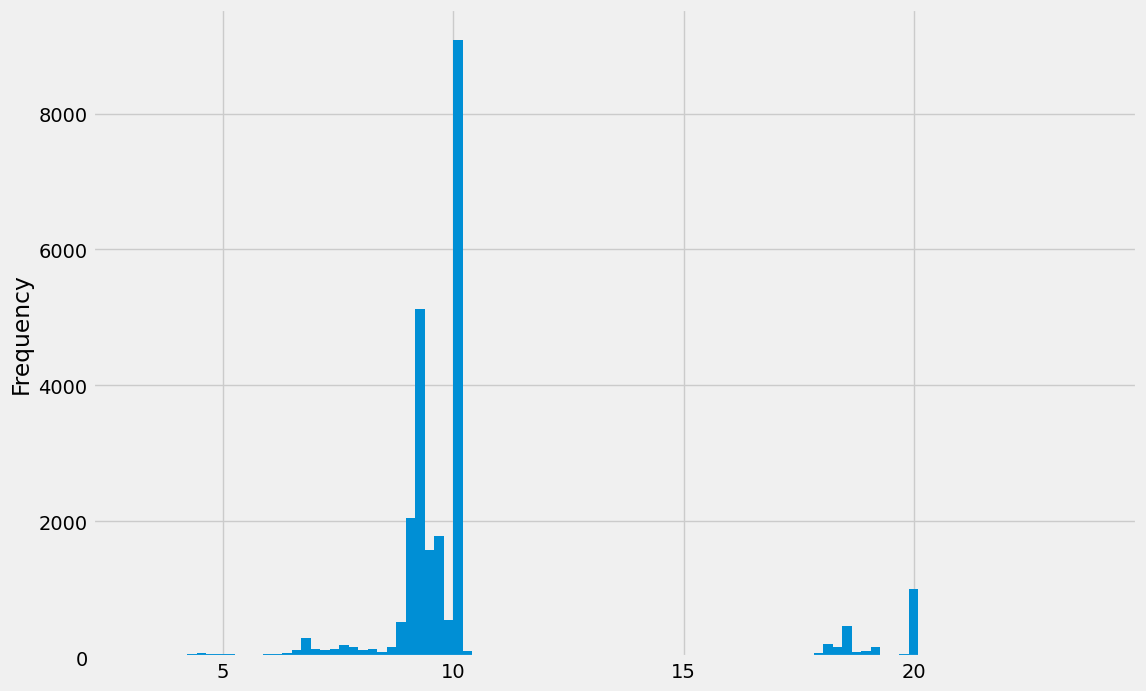

In [65]:
df_event_duration.seconds_within_scoring_range.plot.hist(bins=100);

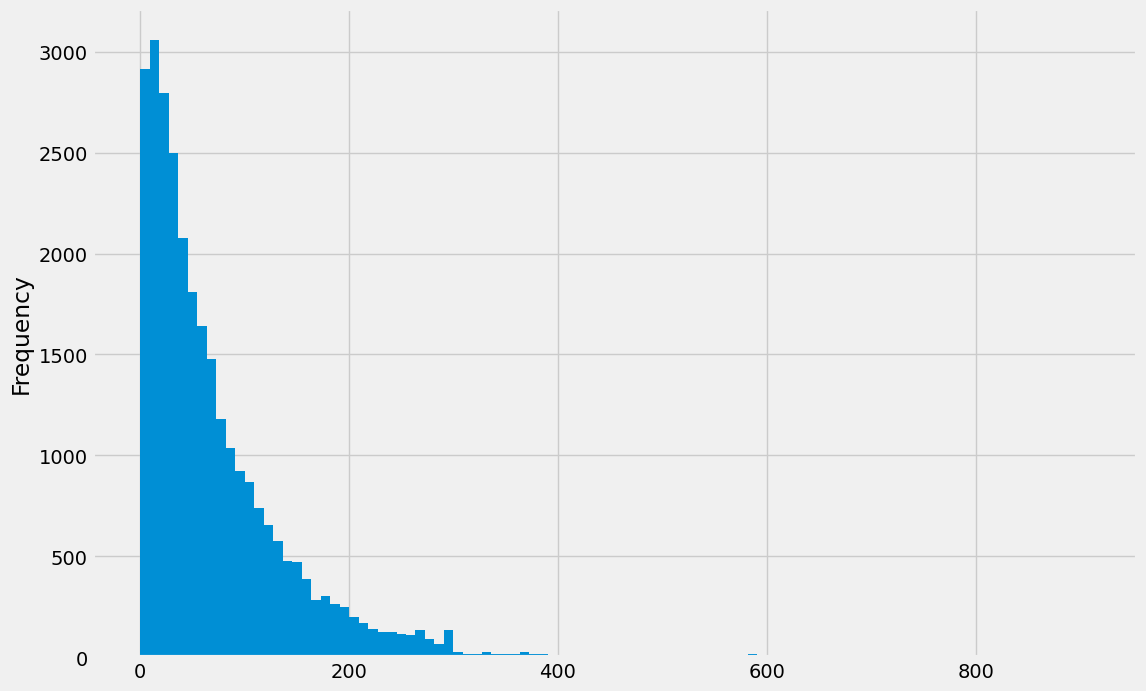

In [66]:
df_event_duration.seconds_outside_scoring_range.plot.hist(bins=100);